#**TUGAS PRAKTIKUM MANDIRI 7 - MACHINE LEARNING (DECISION TREE)**

Nama : Imelda Wahyuni

Nim : 011022042

Sesi : Pagi


#**PENJELASAN DATASET**

Data tentang faktor-faktor yang mungkin memengaruhi rencana pendidikan siswa (plan), yaitu apakah mereka berencana melanjutkan pendidikan (plan) atau tidak (not plan).

Secara garis besar, berikut penjelasan tiap kolom dan maknanya:

- StudentID → Nomor identitas unik tiap siswa.

- Gender → Jenis kelamin siswa, terdiri dari “male” dan “female”.

- Parent_income → Pendapatan orang tua siswa (kemungkinan dalam satuan dolar per tahun). Ini bisa menggambarkan kondisi ekonomi keluarga.

- IQ → Nilai IQ siswa yang menunjukkan tingkat kemampuan kognitif atau kecerdasannya.

- Encourage → Menunjukkan apakah siswa mendapat dorongan atau motivasi (encourage) dari lingkungan (misalnya orang tua atau guru) untuk melanjutkan pendidikan, atau tidak (not encourage).

- Plan → Menunjukkan apakah siswa berencana untuk melanjutkan pendidikan (plan) atau tidak (not plan) setelah jenjang tertentu.

#**1. Import Library**

In [35]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Penjelasan Library :

- pandas → untuk membaca dan mengelola data.

- numpy → operasi numerik.

- matplotlib & seaborn → visualisasi data.

- sklearn → library utama machine learning (pembagian data, model, evaluasi).

#**2. Loading Dataset**

Kode di bawah ini untuk menghubungkan colab dengan drive

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Membaca file CSV menggunakan Pandas**

Selanjutnya, kode menggunakan library Pandas untuk membaca data dari file. Variabel path berisi lokasi folder di Google Drive tempat file collage.csv disimpan. Lalu, fungsi pd.read_csv() dipakai untuk membaca file CSV tersebut dan menyimpannya ke dalam DataFrame, sehingga datanya bisa diproses lebih lanjut.

In [37]:
# Membaca file csv menggunakan pandas
df = pd.read_csv("/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum07/data/college.csv")
df

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan
...,...,...,...,...,...,...
7995,7995,female,55330,125,encourage,plan
7996,7996,female,48240,97,encourage,not plan
7997,7998,male,47300,64,not encourage,not plan
7998,7999,male,24000,103,not encourage,not plan


Terdapat 8000 baris dan 6 kolom pada dataset collage tersebut.

**Menampilkan informasi detail dengan df.info()**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


Terdapat 2 type data dari 6 kolom, int (3) dan object (3)

In [39]:
df.describe()

,StudentID,Parent_income,IQ
count,8000.00000,8000.000000,8000.000000
mean,4000.50000,40584.017500,99.577750
std,2309.54541,18031.506468,18.923655
min,1.00000,4500.000000,60.000000
25%,2000.75000,29400.000000,90.000000
50%,4000.50000,39330.000000,100.000000
75%,6000.25000,51592.500000,110.000000
max,8000.00000,82390.000000,140.000000


#**3. Data Preprocessing**

**Mengecek Missing Value**

Kode di bawah ini adalah mengecekan missing value, apakah terdapat nilai yang kotor atau tidak.

In [40]:
# cek missing value
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


Terlihat ya pada hasil di atas, bahwa tidak ada nilai yang hilang, kotor ataupun yang lainnya. Dataset stunting ini sudah bersih.

In [41]:
# Hapus kolom yang tidak dibutuhkan
df = df.drop(columns=['StudentID'])
df

,Gender,Parent_income,IQ,Encourage,Plan
0,male,53900,118,encourage,plan
1,female,24900,87,not encourage,not plan
2,female,65800,93,not encourage,not plan
3,male,11440,117,encourage,plan
4,female,16700,102,not encourage,not plan
...,...,...,...,...,...
7995,female,55330,125,encourage,plan
7996,female,48240,97,encourage,not plan
7997,male,47300,64,not encourage,not plan
7998,male,24000,103,not encourage,not plan


In [42]:
# Mengecek apakah ada duplikat data
df.duplicated().sum()

np.int64(227)

Terdapat nilai unik sebesar 227.

In [43]:
# Menghapus data duplikat
df = df.drop_duplicates()

In [44]:
# Mengecek ulang apakah ada duplikat data
df.duplicated().sum()

np.int64(0)

#**4. Exploratory Data Analysis**

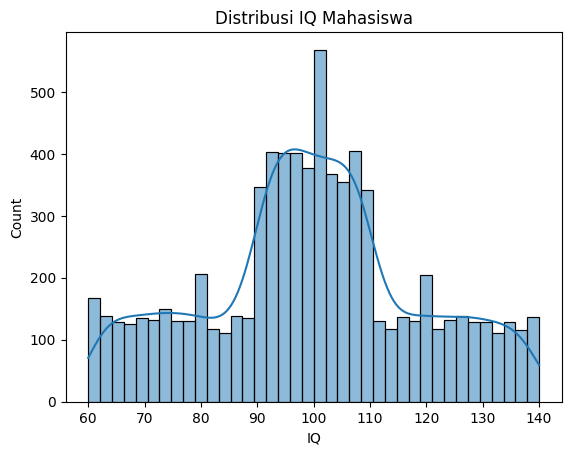

In [45]:
# Distribusi IQ
sns.histplot(df['IQ'], kde=True)
plt.title("Distribusi IQ Mahasiswa")
plt.show()

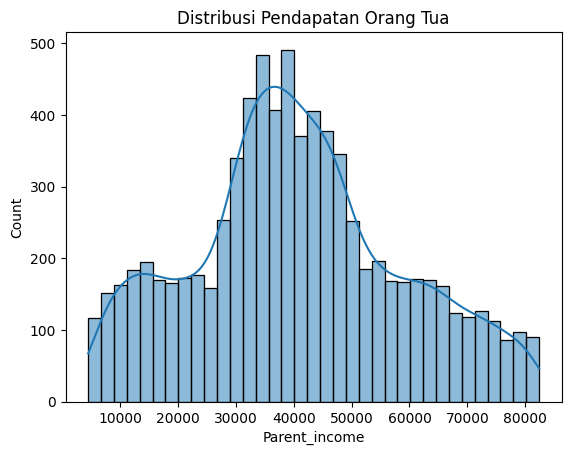

In [46]:
# Distribusi pendapatan
sns.histplot(df['Parent_income'], kde=True)
plt.title("Distribusi Pendapatan Orang Tua")
plt.show()

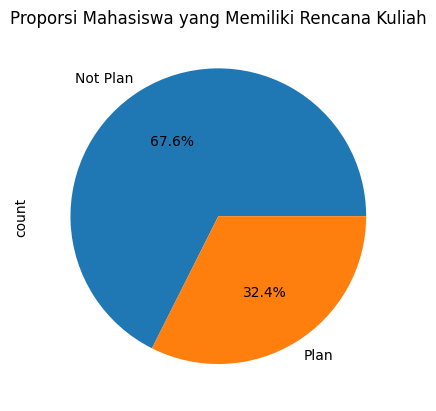

In [47]:
# Proporsi rencana kuliah
df['Plan'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Plan','Plan'])
plt.title("Proporsi Mahasiswa yang Memiliki Rencana Kuliah")
plt.show()

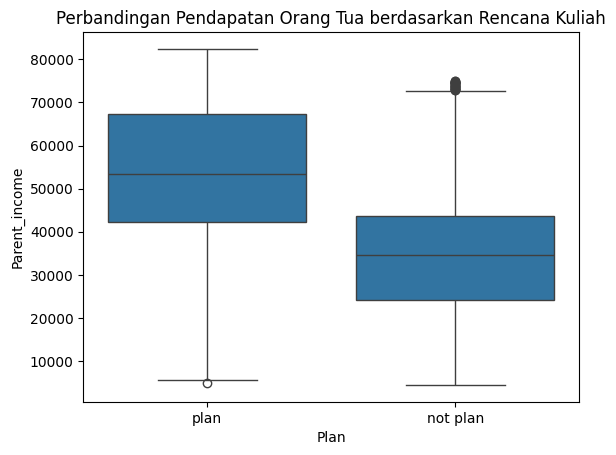

In [48]:
# Perbandingan pendapatan dan IQ berdasarkan rencana kuliah
sns.boxplot(x='Plan', y='Parent_income', data=df)
plt.title("Perbandingan Pendapatan Orang Tua berdasarkan Rencana Kuliah")
plt.show()

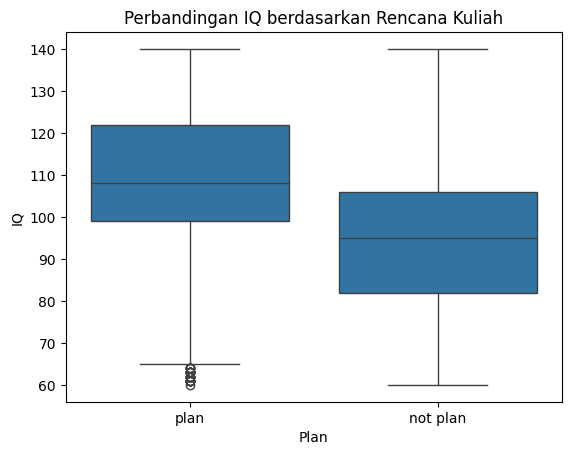

In [49]:
sns.boxplot(x='Plan', y='IQ', data=df)
plt.title("Perbandingan IQ berdasarkan Rencana Kuliah")
plt.show()

/tmp/ipython-input-3816924811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])
/tmp/ipython-input-3816924811.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Encourage'] = le.fit_transform(df['Encourage'])
/tmp/ipython-input-3816924811.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Mapping Gender: {'female': np.int64(0), 'male': np.int64(1)}
Mapping Encourage: {'encourage': np.int64(0), 'not encourage': np.int64(1)}
Mapping Plan: {'not plan': np.int64(0), 'plan': np.int64(1)}


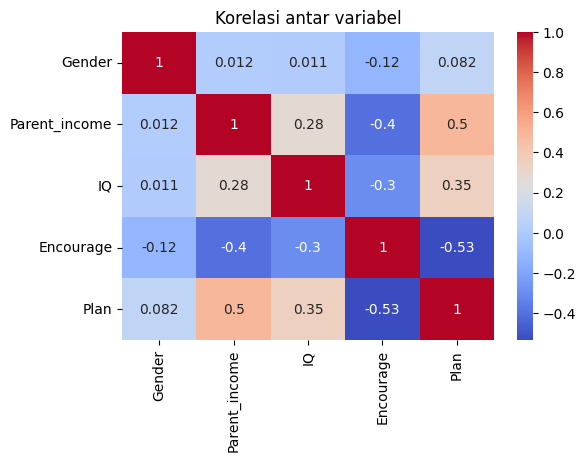

In [51]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Encode kolom 'Gender'
df.loc[:, 'Gender'] = le.fit_transform(df['Gender'])
print('Mapping Gender:', dict(zip(le.classes_, le.transform(le.classes_))))

# Encode kolom 'Encourage'
df.loc[:, 'Encourage'] = le.fit_transform(df['Encourage'])
print('Mapping Encourage:', dict(zip(le.classes_, le.transform(le.classes_))))

# Encode kolom 'Plan' (if not already encoded or for consistency)
df.loc[:, 'Plan'] = le.fit_transform(df['Plan'])
print('Mapping Plan:', dict(zip(le.classes_, le.transform(le.classes_))))

# Sekarang, hitung dan visualisasikan korelasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar variabel")
plt.show()

In [52]:
from sklearn.preprocessing import LabelEncoder

# Mengubah kolom target species menjadi numerik
le = LabelEncoder()
df['plan_encoded'] = le.fit_transform(df['Plan'])

# Menampilkan hasil mapping
print(df[['Plan', 'plan_encoded']].drop_duplicates())

   Plan  plan_encoded
0     1             1
1     0             0


/tmp/ipython-input-1275451981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['plan_encoded'] = le.fit_transform(df['Plan'])


**7. Splitting Data (Pembagian Data Training dan Testing)**

In [54]:
# memilih fitur dan target
feature_cols = ['Gender','Parent_income','IQ','Encourage']
X = df[feature_cols]
y = df['Plan']

In [55]:
# membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(X_train), len(X_test)

(6218, 1555)

**8. Pembuatan Model Decision Tree**

In [56]:
# membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [57]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Encode kolom 'Gender'
df['Gender'] = le.fit_transform(df['Gender'])
print('Mapping Gender:', dict(zip(le.classes_, le.transform(le.classes_))))

# Encode kolom 'Encourage'
df['Encourage'] = le.fit_transform(df['Encourage'])
print('Mapping Encourage:', dict(zip(le.classes_, le.transform(le.classes_))))

# Encode kolom 'Plan'
df['Plan'] = le.fit_transform(df['Plan'])
print('Mapping Plan:', dict(zip(le.classes_, le.transform(le.classes_))))

# Tampilkan info DataFrame setelah encoding untuk verifikasi tipe data
df.info()

Mapping Gender: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
Mapping Encourage: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
Mapping Plan: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
<class 'pandas.core.frame.DataFrame'>
Index: 7773 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender         7773 non-null   int64
 1   Parent_income  7773 non-null   int64
 2   IQ             7773 non-null   int64
 3   Encourage      7773 non-null   int64
 4   Plan           7773 non-null   int64
 5   plan_encoded   7773 non-null   int64
dtypes: int64(6)
memory usage: 425.1 KB


/tmp/ipython-input-465315652.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])
/tmp/ipython-input-465315652.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Encourage'] = le.fit_transform(df['Encourage'])
/tmp/ipython-input-465315652.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

**9. Evaluasi Model Decision Tree**

In [58]:
y_pred = dt.predict(X_test)

# Define the target class names, assuming 0 maps to 'not plan' and 1 maps to 'plan'
planning = ['not plan', 'plan']

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=planning
))

Akurasi: 82.83 %

Confusion Matrix:
 [[914 137]
 [130 374]]

Classification Report:
               precision    recall  f1-score   support

    not plan       0.88      0.87      0.87      1051
        plan       0.73      0.74      0.74       504

    accuracy                           0.83      1555
   macro avg       0.80      0.81      0.80      1555
weighted avg       0.83      0.83      0.83      1555



**10. Visualisasi Hasil Model Decition Tree**

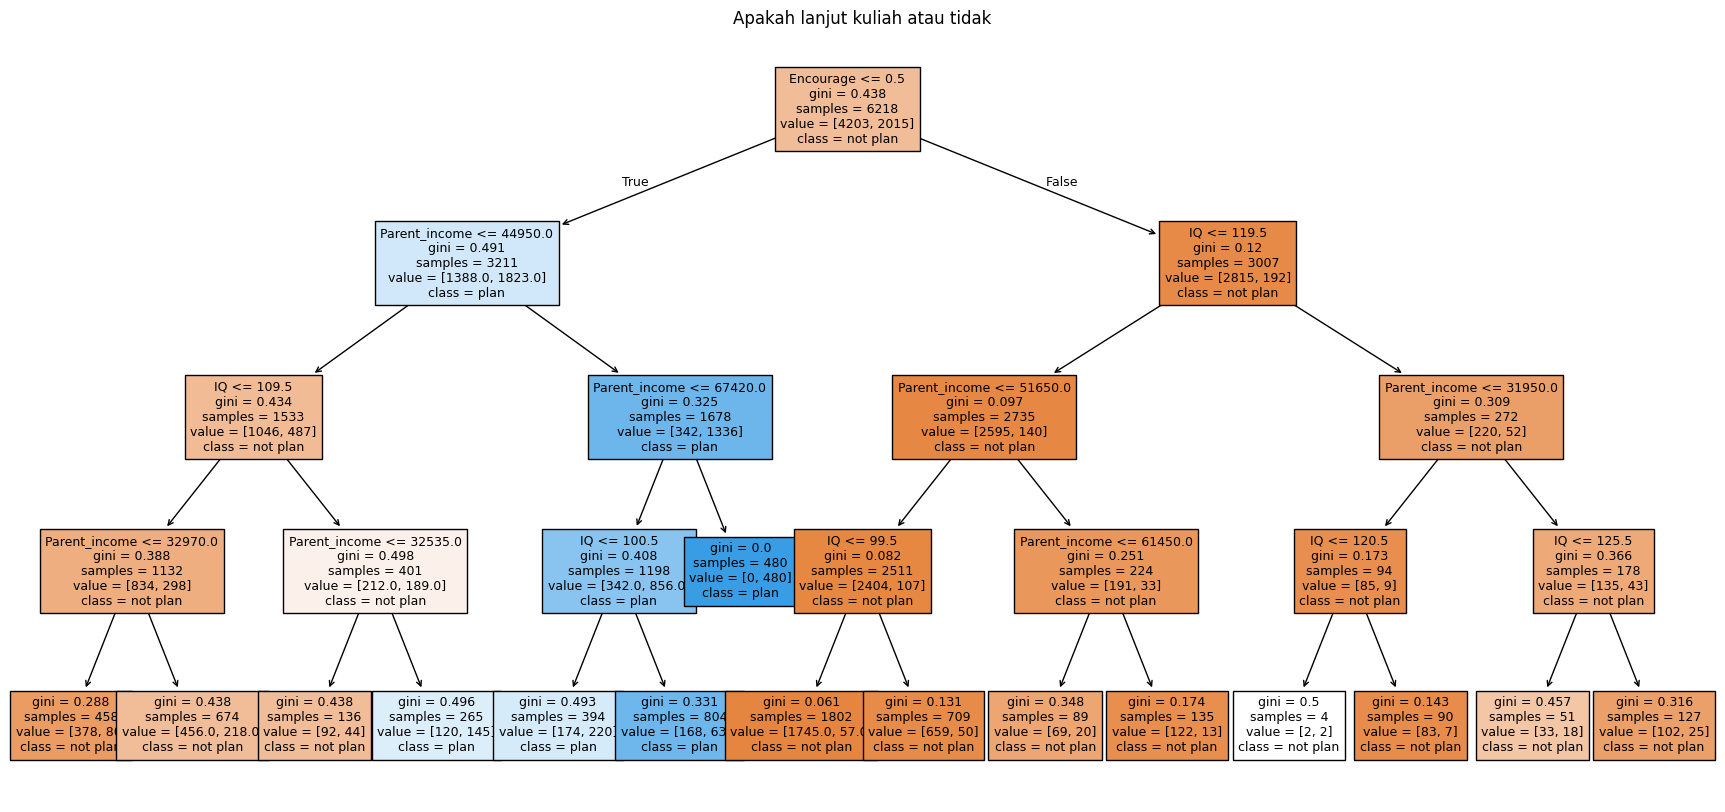

In [59]:
# visualisasi model
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    fontsize=9,
    filled=True,
    feature_names=feature_cols,
    class_names=planning,
)
plt.title("Apakah lanjut kuliah atau tidak")
plt.show()

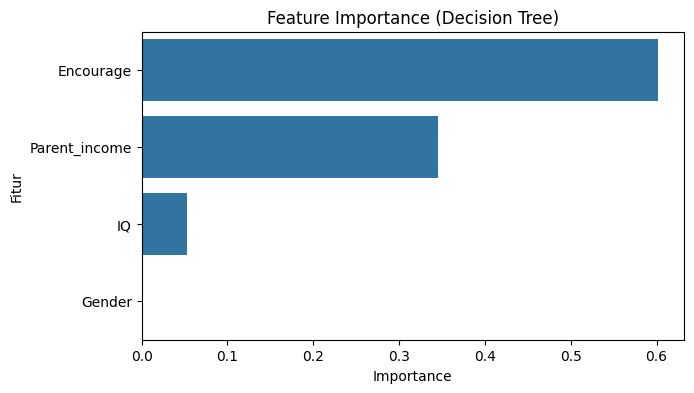

,0
Encourage,0.602000
Parent_income,0.345595
IQ,0.052405
Gender,0.000000


In [60]:
# fitur yang penting

imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7, 4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

**11. Uji Coba Hasil**

In [ ]:
import pandas as pd
import joblib

# Save the trained model
joblib.dump(dt, "decision_tree_college.pkl")

# Muat model yang sudah disimpan
loaded_model = joblib.load("decision_tree_college.pkl")

print("=== Prediksi Keputusan Lanjut Studi ===")
print("Masukkan data berikut:")

# Ambil input pengguna
gender = input("Gender (male/female): ").strip().lower()

# Bersihkan input pendapatan agar aman (hapus koma dan titik ribuan)
income_str = input("Pendapatan orang tua per bulan (Rp): ").strip()
income_str = income_str.replace(",", "").replace(".", "")
parent_income = float(income_str)

iq = float(input("IQ siswa: "))
encourage = input("Dapat dorongan/encouragement? (yes/no): ").strip().lower()

# Ubah input ke format numerik seperti model saat training
gender_enc = 1 if gender == "male" else 0
encourage_enc = 1 if encourage in ["yes", "ya", "encourage"] else 0

# Buat DataFrame input
data_input = pd.DataFrame({
    'Gender': [gender_enc],
    'Parent_income': [parent_income],
    'IQ': [iq],
    'Encourage': [encourage_enc]
})

# Lakukan prediksi
pred = loaded_model.predict(data_input)[0]

# Tampilkan hasil
hasil = "Plan (lanjut studi)" if pred == 1 else "Not Plan (tidak lanjut studi)"
print("\n🎓 Hasil Prediksi:", hasil)

=== Prediksi Keputusan Lanjut Studi ===
Masukkan data berikut:
